In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [2]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.8 MB 762.0 kB/s eta 0:00:15
   - -------------------------------------- 0.5/11.8 MB 762.0 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/11.8 MB 699.0 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.8 MB 799.2 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.8 MB 799.2 kB/s eta 0:00:14
   ----- ---------------------------------- 1.6/11.8 MB 912.1 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.8 MB 940.7 kB/s eta 0:00:11
   ------- ---

In [4]:
pip install gensim


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 540.5 kB/s eta 0:00:44
    --------------------------------------- 0.5/24.0 MB 540.5 kB/s eta 0:00:44
   - -------------------------------------- 0.8/24.0 MB 609.6 kB/s eta 0:00:39
   - -------------------------------------- 1.0/24.0 MB 739.8 kB/s eta 0:00:32
   -- ------------------------------------- 1.3/24.0 MB 745.8 kB/s eta 0:00:31
   -- ------------------------------------- 1.6/24.0 MB 776.5 kB/s eta 0:00:29
   -- ------------------------------------- 1.6/24.0 MB 776.5 kB/s eta 0:00:29
   --- ------------

In [5]:
pip install operator

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement operator (from versions: none)
ERROR: No matching distribution found for operator


In [7]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [10]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub(r'\w*\d\w*', '', sentence)


    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

In [11]:
print ('Cleaning and Tokenizing...')
%time df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot'].map(lambda x: spacy_tokenizer(x))

df_movies.head()

Cleaning and Tokenizing...
CPU times: total: 1min 10s
Wall time: 1min 12s


,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wed, vito, corleone, hear, req..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


In [12]:
movie_plot = df_movies['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wed, vito, corleone, hear, req...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

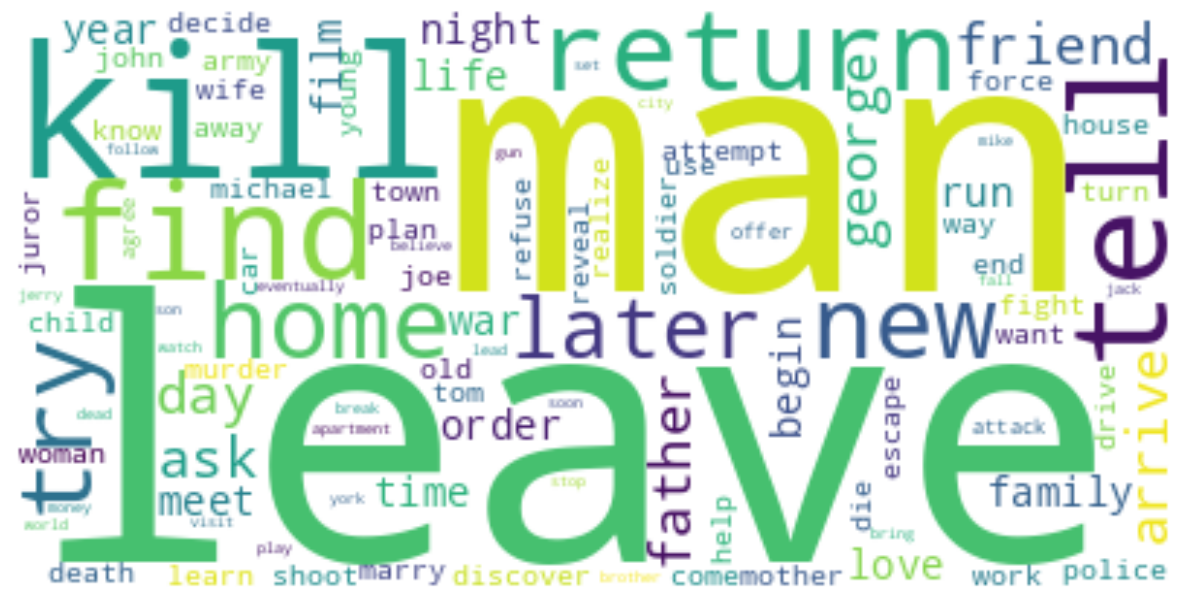

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(movie_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: total: 125 ms
Wall time: 113 ms


In [15]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capos', 39], ['captain', 40], ['car', 41], ['career', 42], ['carlo', 43], ['casino', 44], ['christening', 45], ['christmas', 46], ['clampdown', 47], ['clemenza', 48], ['collapse', 49], ['come', 50]]]


In [16]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capos', 3), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 4), ('connies', 2), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('coveted', 2), ('crime', 2), (

In [17]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: total: 62.5 ms
Wall time: 54 ms
CPU times: total: 18.6 s
Wall time: 4.01 s


In [18]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: total: 203 ms
Wall time: 209 ms
CPU times: total: 156 ms
Wall time: 170 ms


In [19]:
#Load the indexed corpus
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 8407 features, 25990 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


In [20]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: total: 31.2 ms
Wall time: 39.1 ms


In [21]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['title'][movie[0]],
                'Movie Plot': df_movies['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])

In [22]:
# search for movie tiles that are related to below search parameters
search_similar_movies('crime and drugs ')

,Relevance,Movie Title,Movie Plot
0,81.54,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,34.49,The French Connection,"In Marseille, an undercover detective is follo..."
2,32.18,The Godfather,"On the day of his only daughter's wedding, Vit..."
3,29.00,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
4,13.23,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...


In [23]:
# search for movie tiles that are related to below search parameters
search_similar_movies('violence protest march')

,Relevance,Movie Title,Movie Plot
0,74.03,Gandhi,The screenplay of Gandhi is available as a pub...
1,52.20,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
2,27.05,Amadeus,The story begins in 1823 as the elderly Antoni...
3,24.65,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...
4,18.37,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."


In [24]:
# search for movie tiles that are related to below search parameters
search_similar_movies('love affair hate')

,Relevance,Movie Title,Movie Plot
0,45.56,Terms of Endearment,Aurora Greenway (Shirley MacLaine) and her dau...
1,44.17,The Graduate,"Benjamin Braddock, going on from twenty to twe..."
2,30.46,From Here to Eternity,"In 1941, bugler and career soldier Private Rob..."
3,29.43,Out of Africa,"The story begins in 1913 in Denmark, when Kare..."
4,28.12,Wuthering Heights,A traveller named Lockwood (Miles Mander) is c...


In [29]:
#practice
search_similar_movies('crime')

,Relevance,Movie Title,Movie Plot
0,75.60,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,41.25,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...
2,26.94,The Green Mile,"In a Louisiana nursing home in 1999, Paul Edge..."
3,25.27,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
4,20.62,The Godfather,"On the day of his only daughter's wedding, Vit..."


In [30]:
search_similar_movies('comedy and romance')

,Relevance,Movie Title,Movie Plot
0,64.66,Network,"Howard Beale, the longtime anchor of the Union..."
1,54.40,Raging Bull,"In a brief scene in 1964, an aging, overweight..."
2,52.74,Forrest Gump,"While waiting at a bus stop in 1981, Forrest G..."
3,-0.00,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
4,-0.00,Giant,"Jordan ""Bick"" Benedict (Rock Hudson), head of ..."


In [32]:
search_similar_movies('history')

,Relevance,Movie Title,Movie Plot
0,85.92,Gandhi,The screenplay of Gandhi is available as a pub...
1,35.78,Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
2,29.20,The Apartment,"Calvin Clifford (C. C.) ""Bud"" Baxter (Jack Lem..."
3,22.37,The Maltese Falcon,"\n\n\nIn 1539 the Knight Templars of Malta, pa..."
4,0.00,12 Angry Men,The story begins in a New York City courthous...


In [34]:
search_similar_movies('horror')

,Relevance,Movie Title,Movie Plot
0,75.46,Apocalypse Now,"In 1969, U.S. Army Captain and special operati..."
1,54.96,The Exorcist,Lankester Merrin is a veteran Catholic priest ...
2,35.35,Psycho,Patrick Bateman is a wealthy investment banker...
3,0.00,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."
4,-0.00,The Treasure of the Sierra Madre,"Dobbs (Humphrey Bogart) and Curtin (Tim Holt),..."


In [35]:
search_similar_movies('history and drama')

,Relevance,Movie Title,Movie Plot
0,75.92,Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
1,59.85,Gandhi,The screenplay of Gandhi is available as a pub...
2,20.34,The Apartment,"Calvin Clifford (C. C.) ""Bud"" Baxter (Jack Lem..."
3,15.58,The Maltese Falcon,"\n\n\nIn 1539 the Knight Templars of Malta, pa..."
4,0.00,Braveheart,"In 1280, King Edward ""Longshanks"" (Patrick Mcg..."


In [36]:
search_similar_movies('mystery and thriller')

,Relevance,Movie Title,Movie Plot
0,67.52,The Maltese Falcon,"\n\n\nIn 1539 the Knight Templars of Malta, pa..."
1,54.48,2001: A Space Odyssey,"The film consists of four major sections, all ..."
2,40.06,Citizen Kane,\n\n\n\nOrson Welles as Charles Foster Kane\n\...
3,30.67,Psycho,Patrick Bateman is a wealthy investment banker...
4,0.00,The Shawshank Redemption,"In 1947, banker Andy Dufresne is convicted of ..."


In [37]:
search_similar_movies('crime and drama')

,Relevance,Movie Title,Movie Plot
0,63.47,Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
1,59.01,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
2,32.20,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...
3,21.03,The Green Mile,"In a Louisiana nursing home in 1999, Paul Edge..."
4,19.73,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."


In [38]:
search_similar_movies('comedy')

,Relevance,Movie Title,Movie Plot
0,71.09,Raging Bull,"In a brief scene in 1964, an aging, overweight..."
1,68.92,Forrest Gump,"While waiting at a bus stop in 1981, Forrest G..."
2,0.00,Dr. Strangelove or: How I Learned to Stop Worr...,United States Air Force Brigadier General Jack...
3,0.00,Doctor Zhivago,The film takes place mostly against a backdrop...
4,0.00,Mutiny on the Bounty,"In the year 1787, the Bounty sets sail from En..."


In [39]:
search_similar_movies('musical')

,Relevance,Movie Title,Movie Plot
0,65.53,Yankee Doodle Dandy,"\n In the early days of World War II, Cohan ..."
1,48.58,Singin' in the Rain,Don Lockwood is a popular silent film star wit...
2,38.28,The Apartment,"Calvin Clifford (C. C.) ""Bud"" Baxter (Jack Lem..."
3,30.73,The Sound of Music,"In 1938, while living as a young postulant at ..."
4,29.73,Close Encounters of the Third Kind,"In the Sonoran Desert, French scientist Claude..."


In [41]:
search_similar_movies('war and history')

,Relevance,Movie Title,Movie Plot
0,76.48,Gandhi,The screenplay of Gandhi is available as a pub...
1,29.11,Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
2,23.76,The Apartment,"Calvin Clifford (C. C.) ""Bud"" Baxter (Jack Lem..."
3,22.00,Schindler's List,"In 1939, the Germans move Polish Jews into the..."
4,21.07,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...


In [42]:
search_similar_movies('pyschological horror')

,Relevance,Movie Title,Movie Plot
0,75.46,Apocalypse Now,"In 1969, U.S. Army Captain and special operati..."
1,54.96,The Exorcist,Lankester Merrin is a veteran Catholic priest ...
2,35.35,Psycho,Patrick Bateman is a wealthy investment banker...
3,0.00,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."
4,-0.00,The Treasure of the Sierra Madre,"Dobbs (Humphrey Bogart) and Curtin (Tim Holt),..."
